## Question #1
### Given a string representing a Roman numeral, write a function to compute the Arabic numerical equivalent.

In [2]:
def roman_to_arabic(roman_numeral):
    roman_dict= {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
    sum_total=0
    for i in roman_numeral:
        #print(roman_dict[i])
        sum_total+=roman_dict[i]
    return(roman_numeral,sum_total)
   

In [5]:
roman_numeral,arabic_numerical = roman_to_arabic("MDCCLXXVI")
print("Answer #1")
print("Roman numeral:%s is convert to Arabic Numerical:%d" %(roman_numeral, arabic_numerical))

Answer #1
Roman numeral:MDCCLXXVI is convert to Arabic Numerical:1776


## Question #2

### Calculate the Acres of Corns and Oats which generates the maximum profit

Given intances:
 - a) X = 240, Y = 320, P1 = $40, P2 = $30, H1 = 2, H2 = 1
 - b) X = 300, Y = 380, P1 = $70, P2 = $45, H1 = 3, H2 = 1
 - c) X = 180, Y = 420, P1 = $65, P2 = $55, H1 = 3, H2 = 2

### Function to calculate profit for EACH instance

In [137]:
'''Function to calculate profit for EACH instance'''
def profitFunc(instance):    
    '''
    x= Total acres of land
    y= Total hours of labors available
    p1= Profit($) per acres of Corn
    p2= Profit($) per acres of Oat
    h1= Hours needs to play per acres of Corn
    h2= Hours needs to play per acres of Oat    
    A= acres of Corn
    B= acres of Oat
    profit= Generated Profit based on the calculated acres of Oat and Corns
    
    Return: profit, acres of Corns, acres of Oat
    '''
    alst=instance
    
    B = (alst[1]-(alst[4]*alst[0]))/(alst[5]-alst[4])
    A = alst[0]-B
    
    #Calculate Profit
    profit = (alst[2] * A) + (alst[3] * B)
    return(profit, A,B)

### Function to calculate the Maximum profit, Acres of Oat, Acres of Corns 

In [138]:
def findMaxProftFunc(instances):
    '''
    function takes list format of instances with the following sequence
    x= Total acres of land
    y= Total hours of labors available
    p1= Profit($) per acres of Corn
    p2= Profit($) per acres of Oat
    h1= Hours needs to play per acres of Corn
    h2= Hours needs to play per acres of Oat    
    '''
    #initialize variables to store the Best values of Profit, Acres of Corns, Acres of Oat
    best_profit, best_corn,best_oat=0,0,0
    for lst in instances:
        #Call out the profitFunc() to calculate the profit for each instance
        profit, corn,oat = profitFunc(lst)
        #Compare the profit and pick out the best values of profit
        if profit > best_profit: 
            best_profit = profit
            best_corn = corn
            best_oat = oat                    
    return(best_profit, best_corn, best_oat)

In [139]:
'''Store the provided instances in a list format which will be input for the function'''
instances=[[240,320, 40,30,2,1],
           [300,380,70,45,3,1],
           [180,420,65,55,3,2]]

a,b,c=findMaxProftFunc(instances)        
print("Answer #2")
print("The maximum profit $%0.0f with acres of Corn = %0.0f, acres of Oat = %0.0f"%(a,b,c))

Answer #2
The maximum profit $14500 with acres of Corn = 40, acres of Oat = 260


## Question #3

### Given the set of data points, construct a piece-wise linear best-fit approximation (R^2 > 95%) to the curve. https://www.dropbox.com/s/8fxxgkrhej7xb0a/jsed_curve_fit.csv?dl=0 

Summary:
The final liner model (i.e. y=0.13x + 129.75) which was built resulted with R-square = 95%. This means that 95% variation of y is able to be described by the variation of X value.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading Dataset

In [122]:
df=pd.read_csv("jsed_curve_fit.csv")
print("Size of Dataset: ",df.shape)
X=df.x
y=df.y

#Reshape dataset for modeling
X=np.array(df.x).reshape(-1,1)
y=np.array(df.y)

Size of Dataset:  (197, 2)


#### Modeling

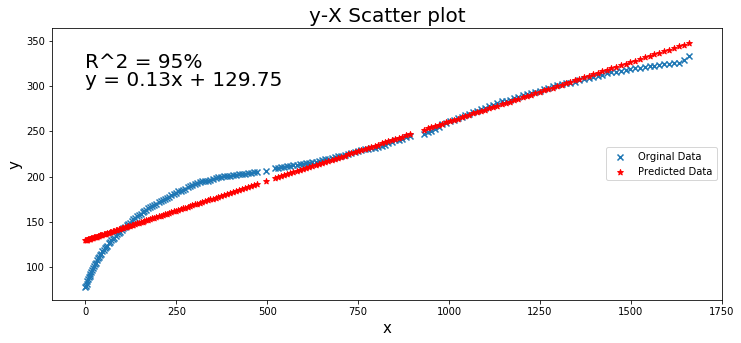

In [135]:
# Loading Linear Library
from sklearn.linear_model import LinearRegression

#Modeling
lr = LinearRegression()
reg=lr.fit(X,y)
ypred=reg.predict(X)

#plot Linear model (Original Data & Predicted Data)
plt.figure( figsize=(12,5))
org_scatter = plt.scatter(x=df.x, y=df.y, marker="x") #Plot
pred_scatter = plt.scatter(X, ypred, color ="red", marker="*") #Plot
plt.title("y-X Scatter plot", fontsize=20)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.text(x=0, y=300, s="y = %0.2fx + %0.2f"%(reg.coef_[0], reg.intercept_), fontsize=20)
plt.text(x=0, y=320, s="R^2 = %0.0F%%"%(reg.score(X, y)*100), fontsize=20)
plt.legend((org_scatter, pred_scatter), 
           ["Orginal Data", "Predicted Data"], loc="right")
plt.show()